In [1]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import os
import matplotlib.ticker as ticker
import pandas as pd
from pandas import Series, DataFrame
import networkx as nx
import warnings

warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import os
import matplotlib.ticker as ticker
import openpyxl













In [3]:
#%%#한글 오류 해결
import matplotlib
from matplotlib import font_manager, rc
import platform
try:
    if platform.system() == 'Windows':
        # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
        # Mac인 경우
        rc('font', family='AppleGothic')
except:
    pass
matplotlib.rcParams['axes.unicode_minus'] = False


In [4]:

path = os.chdir(r"/Users/kylee/Desktop/대외활동및공부/신한빅데이터해커톤")
os.listdir()
#데이터 불러오기
df1 = pd.read_csv("data_038_1.csv", header = 0 )
df2 = pd.read_excel("schema.xlsx")
df1.head()
temp_dat = df1.copy()

temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0


for i in range(1, 168):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]


In [37]:
q1 = temp_dat['B167'].quantile(q=0.25, interpolation='nearest')  # q1 quantile
q2 = temp_dat['B167'].quantile(q=0.5, interpolation='nearest')  # q2 quantile
q3 = temp_dat['B167'].quantile(q=0.75, interpolation='nearest')  # q3 quantile

# 매출을 구간에 따라 나눠줌 (sell_rank 열에 넣어줌)
consume_rank = pd.cut(temp_dat['B167'],
                   bins=[0, q1, q2, q3, max(temp_dat['B167']), np.inf],
                   right=False,
                   labels=["5등급", "4등급", "3등급", "2등급", "1등급"])
temp_dat["consume_rank"] = consume_rank


In [38]:
temp_dat

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,가정용품및가사서비스,보건,교통,통신,오락및문화,교육,기타,쇼핑몰기타,사치품,consume_rank
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,842000,31000,496000,283000,0,0,4545000,102000,0,2등급
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,6000,0,0,0,0,0,727000,0,0,5등급
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,300000,260000,1000,107000,13000,523000,1959000,0,0,3등급
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,0,0,2000,0,43000000,0,0,2등급
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,3947000,6000,0,923000,0,0,4910000,0,0,2등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,52000,50000,0,150000,0,0,964000,0,0,5등급
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,54000,82000,156000,136000,0,0,4907000,48000,0,2등급
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,529000,0,37000,32000,25000,6000,1790000,1000,0,3등급
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,175000,0,0,220000,0,0,1824000,36000,0,3등급


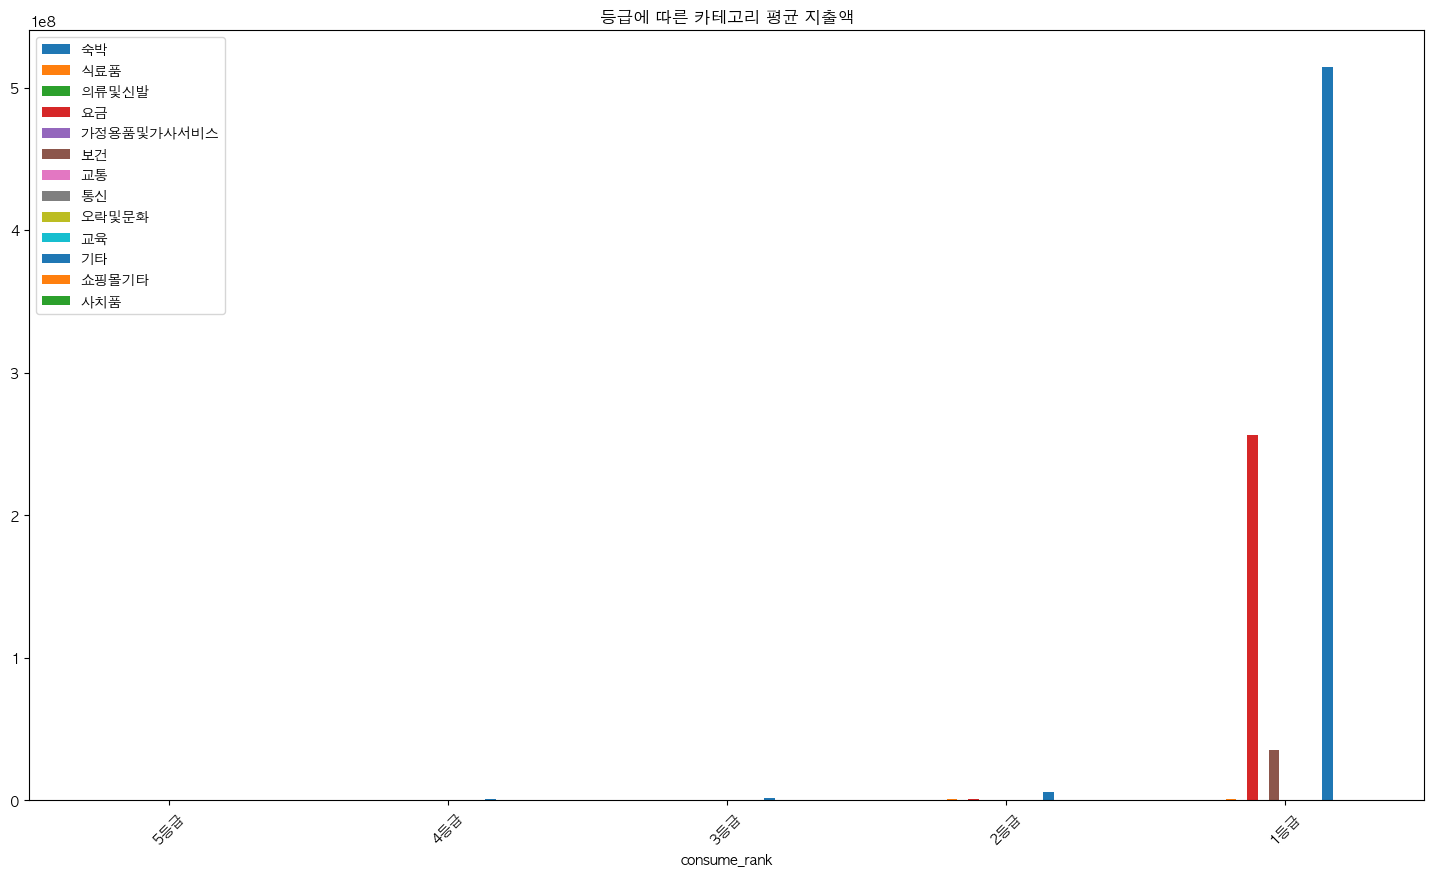

In [29]:
#1. 등급에 따른 카테고리 평균 지출액
temp_groupby = temp_dat.groupby("consume_rank").mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("등급에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
#plt.ylim([0 ,5*10^8 ])
plt.show()



In [24]:
temp_groupby.iloc[:, -13 :  ]

,숙박,식료품,의류및신발,요금,가정용품및가사서비스,보건,교통,통신,오락및문화,교육,기타,쇼핑몰기타,사치품
consume_rank,,,,,,,,,,,,,
5등급,1372.189,164149.134,3316.352,38918.804,49237.796,31611.502,7668.684,26742.407,9620.561,4229.722,508216.952,12387.941,718.444
4등급,3992.453,315750.107,8443.025,90201.757,112859.126,76392.954,13311.381,46694.626,25918.410,16976.096,1097905.573,28410.884,1836.989
3등급,8803.392,473867.296,15067.841,133698.093,210517.114,154688.596,22255.844,65245.758,51714.437,46819.281,1889126.959,53045.499,3501.216
2등급,23838.105,689543.808,30337.002,810794.962,514348.663,675868.323,47220.261,94079.180,110724.606,102845.901,5931995.465,156564.992,11316.786


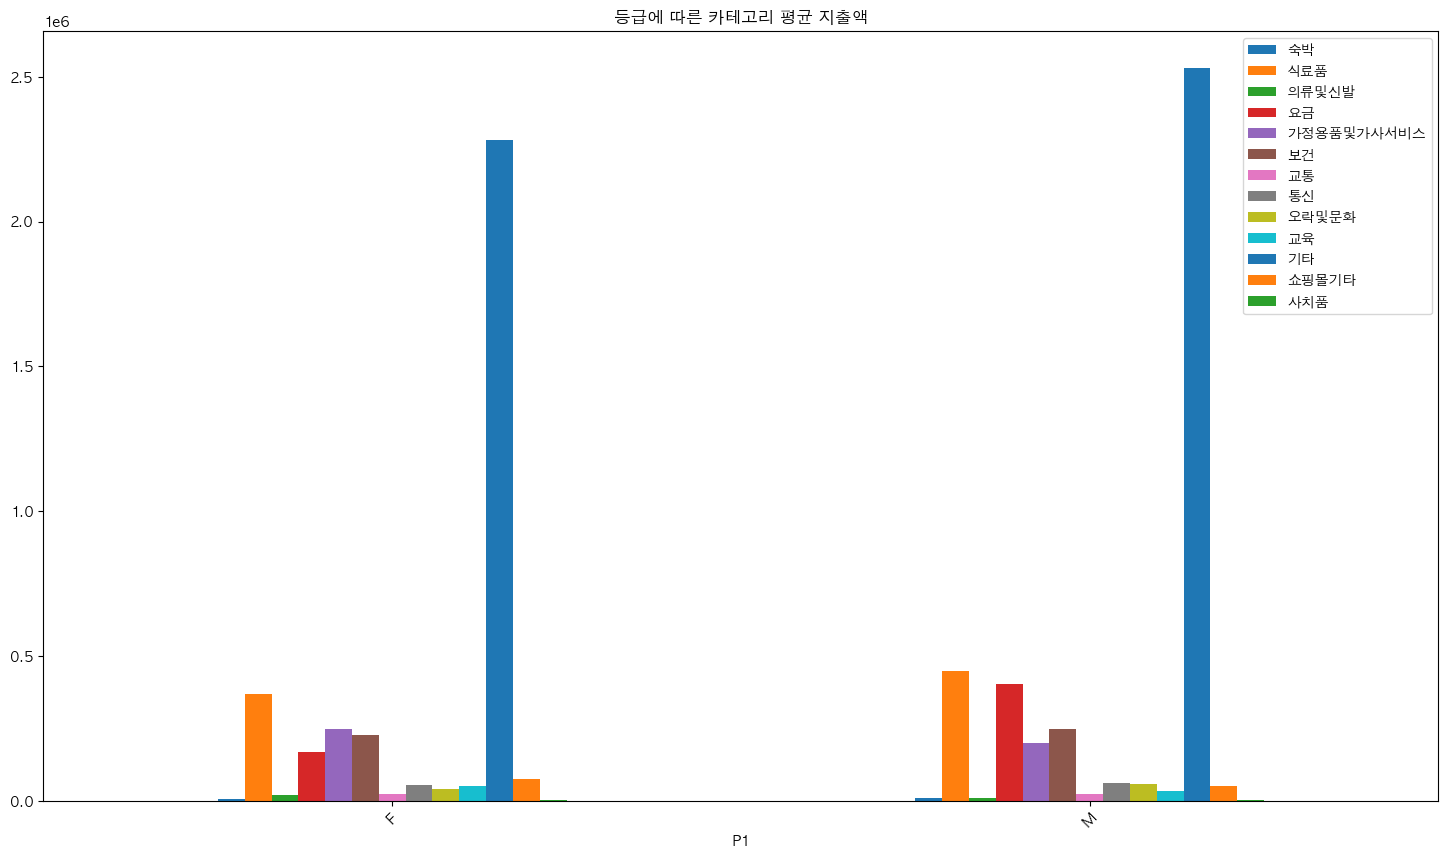

In [34]:
#2.성별/나이에 따른 카테고리 평균 지출액

temp_groupby = temp_dat.groupby(["P1"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("성별에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()



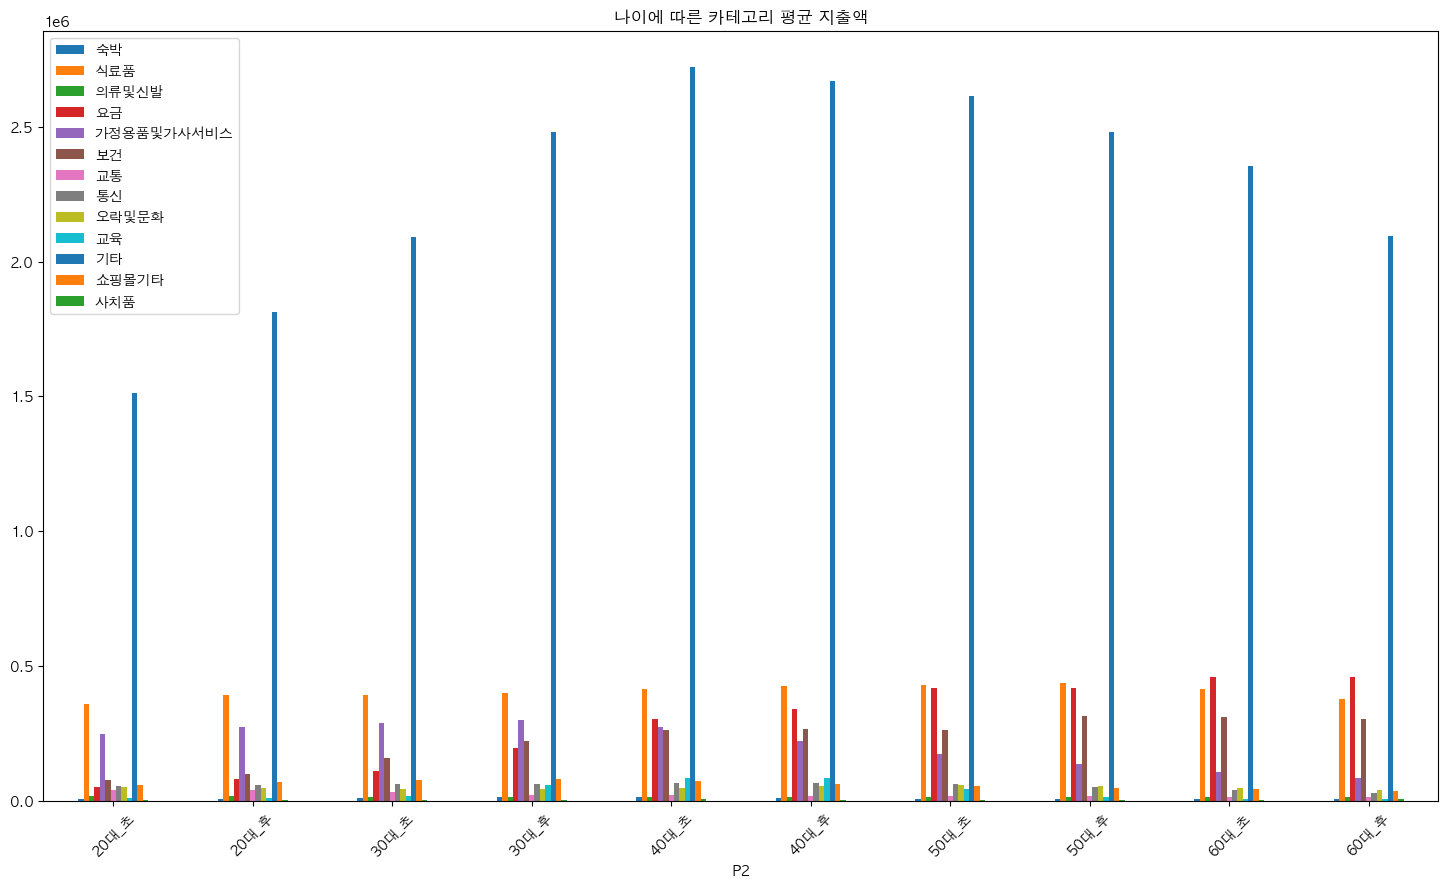

In [36]:
temp_groupby = temp_dat.groupby(["P2"]).mean().round(3)
temp_groupby = temp_groupby.iloc[:, -13:]
temp_groupby.plot.bar(rot=0, figsize = (18,10))
plt.title("나이에 따른 카테고리 평균 지출액")
plt.xticks(rotation=45)
plt.show()


In [32]:
temp_groupby = temp_dat.groupby(["P1"]).mean().round(3)


,P3,P4,P5,P6,B1,B2,B3,B4,B5,B6,...,요금,가정용품및가사서비스,보건,교통,통신,오락및문화,교육,기타,쇼핑몰기타,사치품
P1,,,,,,,,,,,,,,,,,,,,,
F,0.666,0.580,0.096,0.183,3114.764,239.650,227.457,1525.748,2523.594,204.554,...,170056.835,248068.936,229080.098,22772.256,55621.693,40106.916,51082.329,2283138.172,76942.463,4788.510
M,0.682,0.552,0.105,0.122,3397.543,289.929,289.043,1981.640,5226.371,220.385,...,403355.899,200446.929,247672.036,22600.627,60664.889,57922.014,35827.954,2531639.279,50682.017,3989.708
